In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
### Explanatory Data Analysis ###

In [2]:
#read data as a dataframe
df = pd.read_csv("GOOG.csv")

#print first 10 rows
df.head(10)

,Date,Open,High,Low,Close,Volume,Lead
0,2/1/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600,1082.479980
1,3/1/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200,1086.400024
2,4/1/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600,1102.229980
3,5/1/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100,1106.939941
4,8/1/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600,1106.260010
5,9/1/2018,1109.400024,1110.569946,1101.230957,1106.260010,902500,1102.609985
6,10/1/2018,1097.099976,1104.599976,1096.109985,1102.609985,1042800,1105.520020
7,11/1/2018,1106.300049,1106.525024,1099.589966,1105.520020,978300,1122.260010
8,12/1/2018,1102.410034,1124.290039,1101.150024,1122.260010,1720500,1121.760010
9,16/1/2018,1132.510010,1139.910034,1117.832031,1121.760010,1575300,1131.979980


In [3]:
# labelling
# 1 -> next day close is higher than previous day close
# 0 -> next day close is lower than previous day close

df['Movement'] = np.where(df['Lead']>df['Close'],1,0)
df.head()

# Splitting to x and y

X = df.iloc[:,1:7].values
y = df.iloc[:,7].values

#nurmalize the data
# from sklearn.preprocessing import StandardScaler
# X_std = StandardScaler().fit_transform(X)
# dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[1:7])
# dfNorm['Movement'] = df['Movement']
print(X.shape)
print(y.shape)

(250, 6)
(250,)


In [24]:
### Feature Selection

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(250, 5)

In [26]:
plotPerColumnDistribution(dfNorm, 10, 5)
plt.show()

NameError: name 'plotPerColumnDistribution' is not defined

In [4]:
### logistic regression ###

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv = 10)
logreg_cv.fit(x_train,y_train)  

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' 

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in

C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
print("tuned hyperparameters: (best parameters): ", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned hyperparameters: (best parameters):  {'C': 1.0, 'penalty': 'l2'}
accuracy:  0.9257142857142857


In [7]:
logreg2 = LogisticRegression(C = 10, penalty="l2")
logreg2.fit(x_train,y_train)
print("score: ", logreg2.score(x_test,y_test))

score:  0.9066666666666666


C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


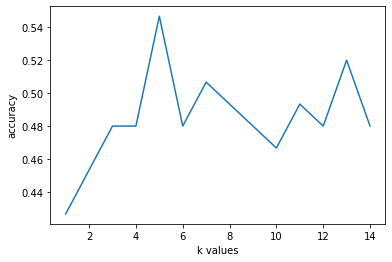

In [8]:
### knn ###

from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,15):
    knn2 =  KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)


In [13]:
print("{}nn score: {}".format(5,knn.score(x_test,y_test)))

5nn score: 0.5466666666666666


In [15]:
### Grid Search Cross Validation (KNN) ###

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors" :np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid , cv = 10) # GridSearchCV
knn_cv.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
print("tuned hyperparameter K:  ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

tuned hyperparameter K:   {'n_neighbors': 13}
tuned parametreye gore en iyi accuracy (best score):  0.568


In [17]:
### SVM ###

from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

print("Accuracy of svm algo: ",svm.score(x_test,y_test))

Accuracy of svm algo:  0.4533333333333333


C:\Users\Dominic Liman\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
### Naive Bayes ###

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

print("Accuracy of Naive Bayes Algo: ", nb.score(x_test,y_test))


Accuracy of Naive Bayes Algo:  0.5466666666666666


In [19]:
### Decision Tree ###

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Accuracy of Decision Tree Algo: ", dt.score(x_test,y_test))

Accuracy of Decision Tree Algo:  0.8133333333333334


In [20]:
### Random Forest ###

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

print("Accuracy of Random Forest Algo: ", rf.score(x_test,y_test))

Accuracy of Random Forest Algo:  0.8


In [21]:
### Confusion Matrix ###

y_pred = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)



<function matplotlib.pyplot.show(*args, **kw)>

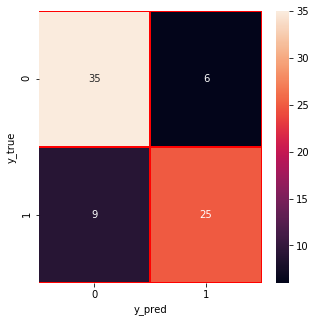

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show